# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline

/Users/dean/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#dropping data that is null
df_raw = pd.read_csv("~/Dropbox/GA Data Science Course/Project Work/Project 3/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [3]:
# frequency table for prestige and whether or not someone was admitted
df.groupby(['prestige', 'admit']).count().drop('gre', axis=1)

gpa
prestige admit     
1.0      0       28
         1       33
2.0      0       95
         1       53
3.0      0       93
         1       28
4.0      0       55
         1       12

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [4]:
df_update=pd.get_dummies(data=df, columns=['prestige'])

In [5]:
df_update.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



<b>Answer:</b> Assuming class refers to prestige, We need n-1 dummy variables, where n is the number of unique choices/categories within the variable. This will avoid the model crashing due to perfect collinearity between dummy variables. 


For now, we'll keep prestige_1.0 for the purposes of hand calculating odds ratios. 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [6]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(df_update.loc[:,'prestige_1.0':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [7]:
#crosstab prestige 1 admission 
#frequency table cutting prestige and whether or not someone was admitted
ct1 = pd.crosstab(handCalc['admit'], handCalc['prestige_1.0'], margins=True)
ct1

prestige_1.0,0,1,All
admit,,,
0,243,28,271
1,93,33,126
All,336,61,397


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [8]:
#admitted and prestige class 1
admit_true = ct1[1][1]
#number of prestige class 1 students
students = ct1[1][2]
#% of people that attended prestige 1 and were admitted
prestige1 = float(admit_true)/students
print 'Likelihood of being admitted to grad school if attended #1 rank college: ' + str(round(prestige1*100, 2))+ "%"

Likelihood of being admitted to grad school if attended #1 rank college: 54.1%


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [9]:
#admitted and not prestige class 1
admit_true = ct1[0][1]
#number of students admitted
students = ct1[0][2]
#% of people that attended prestige 1 and were admitted
prestige_non_1 = float(admit_true)/students
print 'Likelihood of being admitted to grad school if not attended #1 rank college: ' + str(round(prestige_non_1*100, 2))+ "%"

Likelihood of being admitted to grad school if not attended #1 rank college: 27.68%


#### 3.3 Calculate the odds ratio

In [10]:
#Odds Ratio
print "Odds ratio is " + str(prestige1/prestige_non_1)

Odds ratio is 1.95452141724


#### 3.4 Write this finding in a sentence: 

<b>Answer:</b> All other factors held constant, the odds ratio of 1.95 indicates that a student who attends a #1 rank college is 1.95 times more likely to be admitted to grad school versus a student that does not attend a #1 rank college (or put another way, a student that attends a prestige class 1 school is 95% more likely to be admitted than a student who does not attend a prestige class 1 school). 

#### 3.5 Print the cross tab for prestige_4

In [11]:
#crosstab prestige 4 admission 
#frequency table cutting prestige and whether or not someone was admitted
ct2 = pd.crosstab(handCalc['admit'], handCalc['prestige_4.0'],  margins=True)
ct2

prestige_4.0,0,1,All
admit,,,
0,216,55,271
1,114,12,126
All,330,67,397


#### 3.6 Calculate the OR 

In [12]:
#Probability of being admitted if you're prestige 4 (p)
prestige4 = float(ct2[1][1])/ct2[1][2]
print 'Likelihood of being admitted to grad school if attended #4 rank college: ' + str(round(prestige4*100, 2))+ "%"

#Probability of being admitted if you're not prestige 4
non_prestige4 = float(ct2[0][1])/ct2[0][2]
print 'Likelihood of being admitted to grad school if not attended #4 rank college: ' + str(round((non_prestige4)*100, 2))+ "%"

#Odds Ratio = p/(1-p)
print 'The odds ratio is ' + str(round(prestige4/non_prestige4, 3))

Likelihood of being admitted to grad school if attended #4 rank college: 17.91%
Likelihood of being admitted to grad school if not attended #4 rank college: 34.55%
The odds ratio is 0.518


#### 3.7 Write this finding in a sentence

<b>Answer:</b> All other factors equal, students that attend a Prestige Class 4 school are only half as likely (0.52 times as likely) to be admitted into grad school compared to students who attend a school where prestige is higher than class 4. 

## Part 4. Analysis

In [13]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(df_update.loc[:, 'prestige_2.0':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [14]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [15]:
train_cols = data.columns[1:]
train_cols.tolist()

['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0', 'intercept']

#### 4.2 Fit the model

In [16]:
logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [17]:
#show the outputs
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: admit            Pseudo R-squared: 0.082   
Date:               2018-04-29 21:31 AIC:              467.6399
No. Observations:   397              BIC:              491.5435
Df Model:           5                Log-Likelihood:   -227.82 
Df Residuals:       391              LL-Null:          -248.08 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
gre              0.0022   0.0011  2.0280 0.0426  0.0001  0.0044
gpa              0.7793   0.3325  2.3438 0.0191  0.1276  1.4311
prestige_2.0    -0.6801   0.3169 -2.1459 0.0319 -1.3013 -0.0589
prestige_3.0    -1.3387   0.3449 -3.8819 0.0001 -2.0146 -0.6628
prestige_4.0    -1.5534   0.4175 -3.7211 0.0002 -2.3716 -0.7352
intercept       -3.8769   1.1425 -3.3934 0.0007 -6.1161 -1.6376
===============================================================

"""

#### 4.4 Calculate the odds ratios of the coefficients and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [18]:
# odds ratios and 95% CI
params = result.params

conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

<b>Answer:</b> All other factors equal, compared to Prestige Class 1, students in Prestige Class 2 are only 0.51 times as likely to be admitted to graduate school.

#### 4.6 Interpret the OR of GPA

<b>Answer:</b> Holding all else equal, as GPA increases by one point, students are 2.18 times more likely to be admitted. 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [19]:
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
   
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    
    return out

In [20]:
# instead of generating all possible values of GRE and GPA, we're going 
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print(gres)

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print(gpas)

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[220.         284.44444444 348.88888889 413.33333333 477.77777778
 542.22222222 606.66666667 671.11111111 735.55555556 800.        ]
[2.26       2.45333333 2.64666667 2.84       3.03333333 3.22666667
 3.42       3.61333333 3.80666667 4.        ]


#### 5.1 Recreate the dummy variables

In [21]:
# recreate the dummy variables & keep only what we need for making predictions
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige', drop_first=True)
dummy_ranks.columns = ['prestige_2.0', 'prestige_3.0', 'prestige_4.0']
combos = combos.join(dummy_ranks)
combos.drop('prestige', axis=1, inplace=True)

#### 5.2 Make predictions on the enumerated dataset

In [22]:
combos['admit_pred'] = result.predict(combos[['gre', 'gpa', 'intercept', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']])
#Show last 4 observations
len(combos)
combos[396:]

,gre,gpa,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
396,800.0,4.0,1.0,0,0,0,0.985399
397,800.0,4.0,1.0,1,0,0,0.946509
398,800.0,4.0,1.0,0,1,0,0.934534
399,800.0,4.0,1.0,0,0,1,0.582995


#### 5.3 Interpret findings for the last 4 observations

<b>Answer:</b> When we hold GRE and GPA constant (i.e. at the highest possible values), we can see that there is a large difference in admittance probability between prestige level 4 and the other prestige levels. Even if a student attends a Prestige Level 4 college achieves the maximum level GRE and GPA scores possible, they still only have a 58% predicted probability of being admitted to graduate school, where as similar students (whose only difference is a higher college prestige level) have >90% predicted admittance.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

admit_pred
gre        prestige            
220.000000 1.0         0.897874
           2.0         0.704867
           3.0         0.660184
           4.0         0.172354
284.444444 1.0         0.910076
           2.0         0.732708
           3.0         0.690297
           4.0         0.193117
348.888889 1.0         0.920966
           2.0         0.758879
           3.0         0.718934
           4.0         0.215673
413.333333 1.0         0.930652
           2.0         0.783302
           3.0         0.745956
           4.0         0.240018
477.777778 1.0         0.939241
           2.0         0.805936
           3.0         0.771264
           4.0         0.266115
542.222222 1.0         0.946836
           2.0         0.826778
           3.0         0.794798
           4.0         0.293885
606.666667 1.0         0.953536
           2.0         0.845852
           3.0         0.816538
           4.0         0.323213
671.111111 1.0         0.959433
           2.0         0.863211
           3.0         0.836494
           4.0         0.353939
735.555556 1.0         0.964614
           2.0         0.878927
           3.0         0.854707
           4.0         0.385866
800.000000 1.0         0.969158
           2.0         0.893089
           3.0         0.871238
           4.0         0.418761

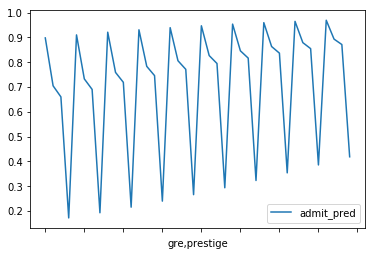

In [23]:
#Reconstitute table with Prestige column for plotting purposes

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
# recreate the dummy variables
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige', drop_first=True)
dummy_ranks.columns = ['prestige_2.0', 'prestige_3.0', 'prestige_4.0']

# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks)
combos.head()

# make predictions on the enumerated dataset, excluding prestige columns for prediction purposes. Drop dummies
combos['admit_pred'] = result.predict(combos[['gre', 'gpa', 'intercept','prestige_2.0', 'prestige_3.0', 'prestige_4.0']])
combos.drop(['prestige_2.0', 'prestige_3.0', 'prestige_4.0'], axis=1, inplace=True)

#Use a Pivot to average out GRE & GPA scores
x = pd.pivot_table(combos, values=['admit_pred'], index=['gre', 'prestige'], aggfunc=np.mean)
x.plot()
x

#Stupid Python can't read the aggregate levels

#pd.pivot_table(combos, values=['admit_pred'], index=['gpa', 'prestige'], aggfunc=np.mean).plot()